In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
from const import *     # 导入模拟常量

In [214]:
# 计算并保存

ret_fac = [np.zeros(N_factors)]       # return of style factors 
ret_ind = [np.zeros(N_industries)]    # return of industry factors

os.system(f'mkdir Dump_Data')
for day in sorted(os.listdir('Test_Data/')):
    print(day)
    os.system(f'mkdir Dump_Data/{day}')
    df_ret = pd.read_csv(f'Test_Data/{day}/daily_return.csv').set_index('Share_Code')
    df_fac = pd.read_csv(f'Test_Data/{day}/factors.csv').set_index('Share_Code').fillna(0)
    df_ind = pd.read_csv(f'Test_Data/{day}/industries.csv').set_index('Share_Code')
    df = pd.concat([df_ret, df_fac, df_ind], axis = 1)
    model = sm.OLS(df.iloc[:,0], df.iloc[:,1:])         # 普通最小二乘模型
    results = model.fit()                               # 回归
    rp = results.params                                 # 每日的风格因子收益 F_ret[j] 和 行业收益率 I_ret[j]
    df_fr = pd.DataFrame(rp, columns=['Factor_Ret'])    # factor_ret
    df_fr.index.names = ['Factor_Name']
    df_fr.iloc[:N_factors,].to_csv(f'Dump_Data/{day}/style_factor_return.csv')
    df_fr.iloc[N_factors:,].to_csv(f'Dump_Data/{day}/industry_factor_return.csv')
    residual = results.resid                            # 股票日残差收益率 S_ret[i]
    df_resid = pd.DataFrame(residual, index = df_ret.index, columns = ['Residual_Returns'])
    df_resid.to_csv(f'Dump_Data/{day}/residual_return.csv')

01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20


In [4]:
# 结果展示

def show_factor_ret(tp = 'style', split = 1):         # tp: 'style' or 'industry'; split: number of group
    if tp == 'portfolio':
        ret_fac = [np.zeros(N_factors + N_industries)]
        for day in sorted(os.listdir('Dump_Data/'))[1:]:
            df_fr = pd.read_csv(f'Dump_Data/{day}/return_decomposition.csv').set_index('Factor_Name')
            ret_fac.append(df_fr['Return'][:-1])
    else:
        N = N_factors if tp == 'style' else N_industries
        ret_fac = [np.zeros(N)]                          # return of factors 
        for day in sorted(os.listdir('Dump_Data/')):
            df_fr = pd.read_csv(f'Dump_Data/{day}/{tp}_factor_return.csv').set_index('Factor_Name')
            ret_fac.append(df_fr['Factor_Ret'])
    data = np.array(ret_fac).T                       # factors
    group_size = (len(data) + 1) // split            # 每一组的因子个数
    s_title = ('{:^15}'.format('Factor') + '{:^15}'.format('Days') + '{:^15}'.format('Mean') 
               + '{:^15}'.format('Mean / Std') + '{:^15}'.format('AutoTsCorr') + '\n')
    s_info = ''
    for i in range(len(data)):
        plt.plot(data[i].cumsum(), label = ret_fac[1].index[i])
        s_info += (f'{ret_fac[1].index[i] :^15}{len(data[i]) - 1 :^15}{np.mean(data[i]) :^15.5f}' 
                   + f'{np.mean(data[i]) / np.std(data[i]) :^15.5f}' 
                   + f'{np.corrcoef(range(len(data[i])), data[i].cumsum())[0][1] :^15.5f}\n')
        if (i + 1) % group_size == 0 or i + 1 == len(data):
            plt.xlabel('Days')
            plt.ylabel('Cum ret')
            plt.title(f'Cumulative return of {tp} factors')
            plt.legend(bbox_to_anchor=(1, 1))
            plt.show() # 画图 
            print(s_title + s_info)
            s_info = ''

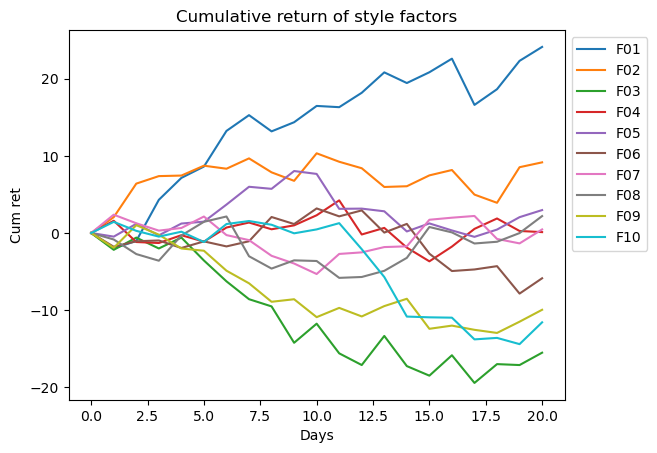

    Factor          Days           Mean        Mean / Std     AutoTsCorr   
      F01            20           1.14779        0.46909        0.91904    
      F02            20           0.43577        0.21787        0.30001    
      F03            20          -0.73828       -0.30039       -0.92149    
      F04            20           0.00541        0.00307       -0.02736    
      F05            20           0.14141        0.08565        0.01589    
      F06            20          -0.27927       -0.15597       -0.46898    
      F07            20           0.02200        0.01360       -0.11981    
      F08            20           0.10429        0.05271        0.08142    
      F09            20          -0.47366       -0.28384       -0.90324    
      F10            20          -0.55109       -0.29164       -0.85880    



In [47]:
ret_fac = show_factor_ret()

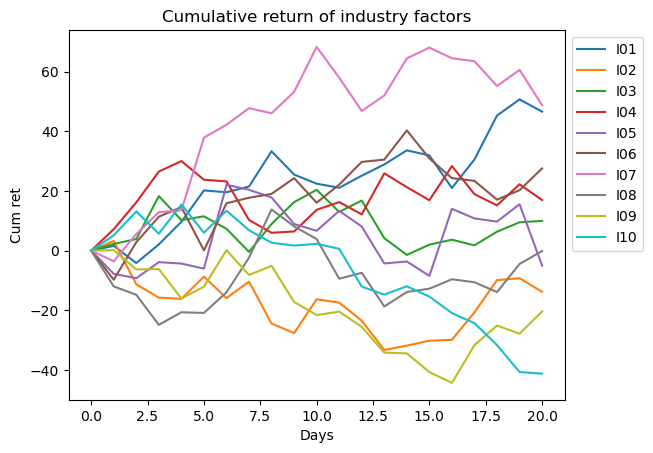

    Factor          Days           Mean        Mean / Std     AutoTsCorr   
      I01            20           2.22036        0.34164        0.89724    
      I02            20          -0.65790       -0.09217       -0.46814    
      I03            20           0.47481        0.07585       -0.03295    
      I04            20           0.80662        0.11225        0.26026    
      I05            20          -0.23875       -0.02330        0.24860    
      I06            20           1.31327        0.16752        0.74499    
      I07            20           2.32281        0.26272        0.82648    
      I08            20          -0.00633       -0.00083        0.13976    
      I09            20          -0.97228       -0.14446       -0.80438    
      I10            20          -1.96531       -0.33168       -0.89521    



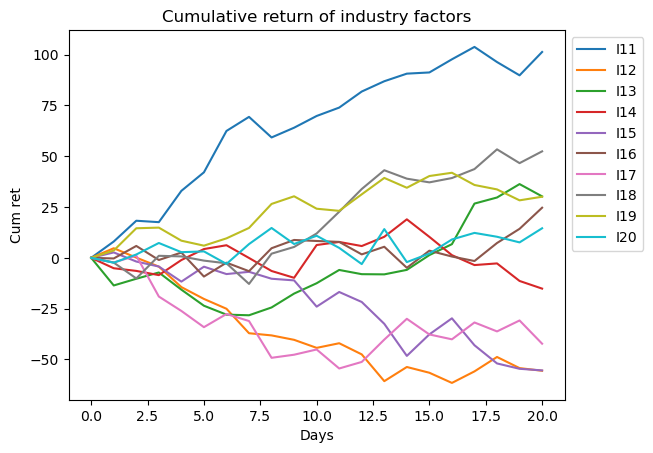

    Factor          Days           Mean        Mean / Std     AutoTsCorr   
      I11            20           4.82110        0.68171        0.94810    
      I12            20          -2.64517       -0.47715       -0.92122    
      I13            20           1.43905        0.20619        0.72918    
      I14            20          -0.72116       -0.11472        0.02398    
      I15            20          -2.63663       -0.36984       -0.94618    
      I16            20           1.17376        0.17964        0.49360    
      I17            20          -2.01128       -0.23997       -0.61338    
      I18            20           2.49368        0.36367        0.92400    
      I19            20           1.43092        0.26093        0.85531    
      I20            20           0.69201        0.09422        0.49143    



In [48]:
show_factor_ret('industry', 2)

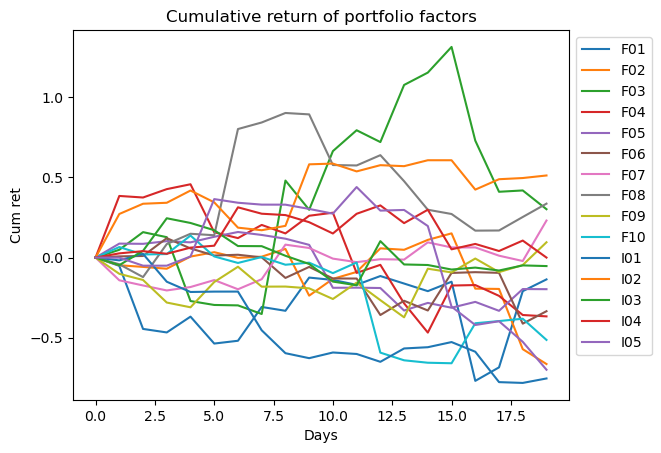

    Factor          Days           Mean        Mean / Std     AutoTsCorr   
      F01            19          -0.00681       -0.03181       -0.07325    
      F02            19          -0.03319       -0.23957       -0.48456    
      F03            19           0.01508        0.05219        0.62868    
      F04            19          -0.01833       -0.10613       -0.82669    
      F05            19          -0.00985       -0.12328       -0.81513    
      F06            19          -0.01672       -0.14553       -0.76794    
      F07            19           0.01155        0.12868        0.71948    
      F08            19           0.01681        0.09115        0.20738    
      F09            19           0.00477        0.04278        0.28850    
      F10            19          -0.02567       -0.17386       -0.80931    
      I01            19          -0.03769       -0.45146       -0.91235    
      I02            19           0.02560        0.21166        0.68607    
      I03   

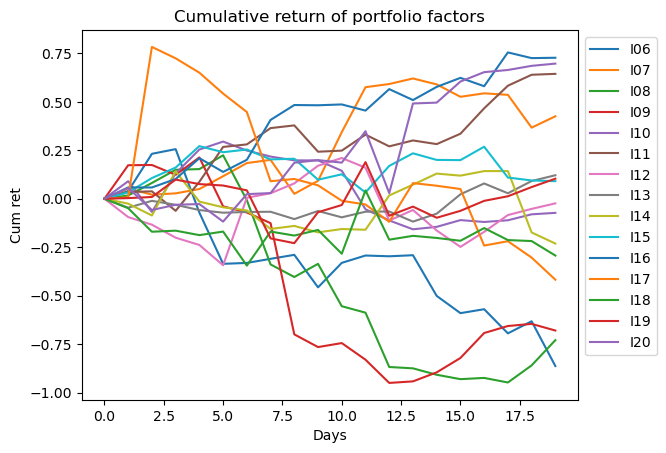

    Factor          Days           Mean        Mean / Std     AutoTsCorr   
      I06            19          -0.04315       -0.32598       -0.89258    
      I07            19           0.02126        0.21527        0.82712    
      I08            19          -0.03647       -0.29098       -0.91190    
      I09            19          -0.03399       -0.22232       -0.81549    
      I10            19          -0.00364       -0.04308       -0.60433    
      I11            19           0.03220        0.41594        0.88616    
      I12            19          -0.00120       -0.01019        0.06178    
      I13            19           0.00606        0.14691        0.47855    
      I14            19          -0.01156       -0.10730        0.04688    
      I15            19           0.00453        0.06386        0.12150    
      I16            19           0.03636        0.50432        0.96525    
      I17            19          -0.02088       -0.09774       -0.72545    
      I18   

In [49]:
show_factor_ret('portfolio', 2)

In [19]:
def decomposition(date_list, t):
    today = date_list[t]
    yesterday = date_list[t - 1]
    M_sfExpo = np.array(pd.read_csv(f'Test_Data/{today}/factors.csv').iloc[:,1:].fillna(0))        # 风格因子暴露
    M_ifExpo = np.array(pd.read_csv(f'Test_Data/{today}/industries.csv').iloc[:,1:])               # 行业暴露
    # V_ret = np.array(pd.read_csv(f'Test_Data/{today}/daily_return.csv')['Returns'])                # 真实收益
    df = pd.read_csv(f'Dump_Data/{today}/style_factor_return.csv')                                 # 风格因子收益
    sf_name = df['Factor_Name']
    V_sfRet = np.array(df['Factor_Ret'])   
    df = pd.read_csv(f'Dump_Data/{today}/industry_factor_return.csv')                              # 行业因子收益
    if_name = df['Factor_Name']
    V_ifRet = np.array(df['Factor_Ret'])  
    V_resi = np.array(pd.read_csv(f'Dump_Data/{today}/residual_return.csv')['Residual_Returns'])   # 残差收益率
    W = np.array(pd.read_csv(f'Test_Data/{yesterday}/daily_weight.csv')['Weight'])                 # 投资权重
    rsf = np.matmul(W.T, M_sfExpo) * V_sfRet
    rif = np.matmul(W.T, M_ifExpo) * V_ifRet
    u = np.dot(W.T, V_resi)
    df_d = pd.DataFrame(np.append(rsf, rif), index = pd.concat([sf_name, if_name]), columns=['Return'])
    df_d.loc['Residual'] = u
    df_d.to_csv(f'Dump_Data/{today}/return_decomposition.csv')
    # print(sum(rsf) + sum(rif) + u)
    # print(np.dot(W.T, V_ret))

In [20]:
date_list = sorted(os.listdir('Test_Data/'))
for t in range(1, len(date_list)):
    decomposition(date_list, t)